In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [52]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2778,2779,15761141,Palerma,604,Spain,Female,71,10,0.00,2,1,1,129984.20,0
5610,5611,15783816,Lori,733,France,Female,28,5,0.00,2,0,0,12761.16,0
9942,9943,15683007,Torode,739,Germany,Female,25,5,113113.12,1,1,0,129181.27,0
6517,6518,15795246,Kaeppel,628,Germany,Female,51,9,155903.82,2,1,1,71159.84,0
5574,5575,15764073,Arcuri,503,Spain,Female,36,9,0.00,2,1,1,16274.67,0


In [53]:
df =df.drop(columns = ['RowNumber','CustomerId','Surname'])


In [54]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [55]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [56]:
df =pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [57]:
x = df.drop(columns = ['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [58]:
x.shape

(10000, 11)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [60]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential()

model.add(Dense(11,activation = 'sigmoid', input_dim = 11))
model.add(Dense(11,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [68]:
history = model.fit(x_train,y_train,batch_size = 50, epochs = 100, verbose = 1, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7967 - loss: 0.5297 - val_accuracy: 0.7969 - val_loss: 0.5130
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 0.5181 - val_accuracy: 0.7969 - val_loss: 0.5078
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.5141 - val_accuracy: 0.7969 - val_loss: 0.5046
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8024 - loss: 0.4964 - val_accuracy: 0.7969 - val_loss: 0.5020
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7976 - loss: 0.5012 - val_accuracy: 0.7969 - val_loss: 0.5004
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8027 - loss: 0.4936 - val_accuracy: 0.7969 - val_loss: 0.4994
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4962 - val_accuracy: 0.7969 - val_loss: 0.4988
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.5082 - val_accu

In [69]:
y_pred = model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.24247356],
       [0.24247356],
       [0.2594498 ],
       ...,
       [0.2594498 ],
       [0.23503686],
       [0.24247356]], dtype=float32)

In [70]:
y_pred = y_pred.argmax(axis=-1)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

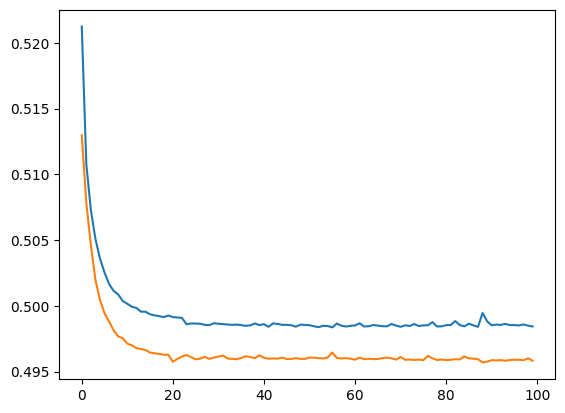

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

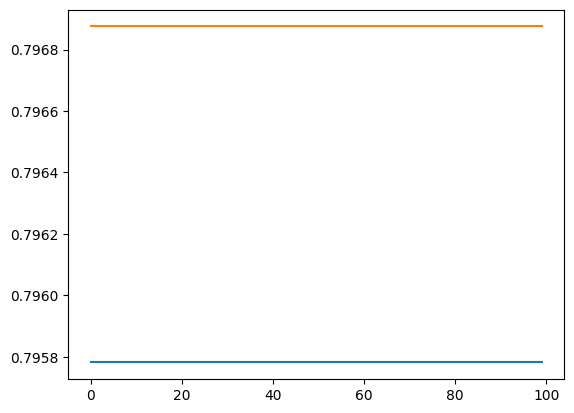

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])